<a href="https://colab.research.google.com/github/fsndzomga/Deep-Learning-With-Python/blob/main/classification_model_from_scratch_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np

num_samples_per_class = 1000

first_sample = np.random.multivariate_normal(mean=[2,4],cov=[[1.0,0.7],[0.7,1.0]], size=num_samples_per_class)

second_sample = np.random.multivariate_normal(mean=[6,3], cov=[[1.0,0.7],[0.7,1.0]], size=num_samples_per_class)

inputs = np.vstack((first_sample, second_sample)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class,1), dtype ="float32"),np.ones((num_samples_per_class,1),dtype="float32")))

Ploting data with matplotlib

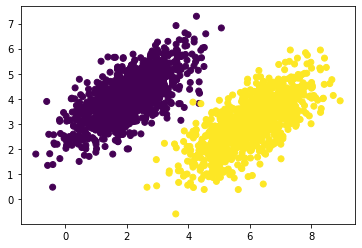

In [6]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])

plt.show()

In [13]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value= tf.random.uniform(shape=(input_dim, output_dim)))

b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [14]:
def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.01

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W,grand_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grand_loss_wrt_b * learning_rate)
  
  return loss

In [15]:
for step in range(50):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 9.4105
Loss at step 1: 1.1586
Loss at step 2: 0.1845
Loss at step 3: 0.0672
Loss at step 4: 0.0510
Loss at step 5: 0.0471
Loss at step 6: 0.0448
Loss at step 7: 0.0429
Loss at step 8: 0.0413
Loss at step 9: 0.0399
Loss at step 10: 0.0386
Loss at step 11: 0.0375
Loss at step 12: 0.0365
Loss at step 13: 0.0356
Loss at step 14: 0.0349
Loss at step 15: 0.0342
Loss at step 16: 0.0336
Loss at step 17: 0.0331
Loss at step 18: 0.0326
Loss at step 19: 0.0322
Loss at step 20: 0.0318
Loss at step 21: 0.0315
Loss at step 22: 0.0312
Loss at step 23: 0.0310
Loss at step 24: 0.0307
Loss at step 25: 0.0305
Loss at step 26: 0.0303
Loss at step 27: 0.0302
Loss at step 28: 0.0300
Loss at step 29: 0.0299
Loss at step 30: 0.0298
Loss at step 31: 0.0297
Loss at step 32: 0.0296
Loss at step 33: 0.0295
Loss at step 34: 0.0294
Loss at step 35: 0.0294
Loss at step 36: 0.0293
Loss at step 37: 0.0293
Loss at step 38: 0.0292
Loss at step 39: 0.0291
Loss at step 40: 0.0291
Loss at step 41: 0.0291
Lo

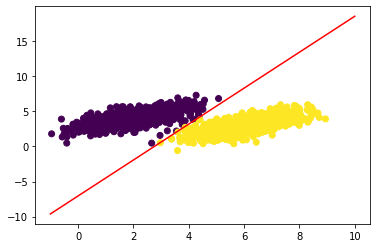

In [17]:
predictions = model(inputs)

x = np.linspace(-1,10,1000)

y = -W[0]/W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, "-r")

plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0]>0.5)

plt.show()